## Observations and Insights 

In [31]:
print('**********************************************************************')
print('                     INFERENCES FROM BELOW DATA')
print('**********************************************************************')
print("1. The two most successful trials based upon mouse survival rate and")
print('   average tumor volume were Capomulin and Ramicane.')
print('2. The sex of the mouse had little to no affect on the survival rate')
print('   of the mouse.')
print('3. The mice on the placebo regimen fared better than some of the mice')
print('   on actual drug trials. This could indicate that some of the cocktails')
print('   negatively affected the mice.')
print('**********************************************************************')
print('                     BONUS INFERENCE!!!!!!!!!')
print('**********************************************************************')
print('4. The positive correlation with a fairly high correlation coefficient')
print('   could indicate that the larger tumors could be because the mice were')
print('   larger and could have had less to do with the durg regimen.')

**********************************************************************
                     INFERENCES FROM BELOW DATA
**********************************************************************
1. The two most successful trials based upon mouse survival rate and
   average tumor volume were Capomulin and Ramicane.
2. The sex of the mouse had little to no affect on the survival rate
   of the mouse.
3. The mice on the placebo regimen fared better than some of the mice
   on actual drug trials. This could indicate that some of the cocktails
   negatively affected the mice.
**********************************************************************
                     BONUS INFERENCE!!!!!!!!!
**********************************************************************
4. The positive correlation with a fairly high correlation coefficient
   could indicate that the larger tumors could be because the mice were
   larger and could have had less to do with the durg regimen.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import os
import random
from scipy.stats import linregress

# Study data files
mouse_metadata_path = os.path.join('data', 'Mouse_metadata.csv')
study_results_path = os.path.join('data', 'Study_results.csv')

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
# Combine the data into a single dataset
combine_mouse = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

In [3]:
# Checking the number of mice in the DataFrame.
combine_mouse['Mouse ID'].nunique()

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_data = combine_mouse[combine_mouse.duplicated(subset=['Mouse ID','Timepoint'])]
duplicate_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
combine_mouse.loc[combine_mouse['Mouse ID']=='g989']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse = combine_mouse.drop_duplicates(subset=['Mouse ID','Timepoint'],keep='first')
clean_mouse.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice in the clean DataFrame.
Number_Unique = clean_mouse['Mouse ID'].nunique()
Number_Unique

249

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# This method is the most straightforward, creating multiple series and putting them all together at the end.

#Create a Series for each of the Drugs Tumor Volumes

Tumor_V_Capomulin = (clean_mouse.loc[clean_mouse['Drug Regimen']=='Capomulin'])['Tumor Volume (mm3)']
Tumor_V_Ceftamin = (clean_mouse.loc[clean_mouse['Drug Regimen']=='Ceftamin'])['Tumor Volume (mm3)']
Tumor_V_Infubinol = (clean_mouse.loc[clean_mouse['Drug Regimen']=='Infubinol'])['Tumor Volume (mm3)']
Tumor_V_Ketapril = (clean_mouse.loc[clean_mouse['Drug Regimen']=='Ketapril'])['Tumor Volume (mm3)']
Tumor_V_Naftisol = (clean_mouse.loc[clean_mouse['Drug Regimen']=='Naftisol'])['Tumor Volume (mm3)']
Tumor_V_Placebo = (clean_mouse.loc[clean_mouse['Drug Regimen']=='Placebo'])['Tumor Volume (mm3)']
Tumor_V_Propriva = (clean_mouse.loc[clean_mouse['Drug Regimen']=='Propriva'])['Tumor Volume (mm3)']
Tumor_V_Ramicane = (clean_mouse.loc[clean_mouse['Drug Regimen']=='Ramicane'])['Tumor Volume (mm3)']
Tumor_V_Stelasyn = (clean_mouse.loc[clean_mouse['Drug Regimen']=='Stelasyn'])['Tumor Volume (mm3)']
Tumor_V_Zoniferol = (clean_mouse.loc[clean_mouse['Drug Regimen']=='Zoniferol'])['Tumor Volume (mm3)']

#Create a List of series for each Drug
Drug_Tumor = [Tumor_V_Capomulin, Tumor_V_Ceftamin, Tumor_V_Infubinol, Tumor_V_Ketapril, Tumor_V_Naftisol,
             Tumor_V_Placebo, Tumor_V_Propriva, Tumor_V_Ramicane, Tumor_V_Stelasyn, Tumor_V_Zoniferol]

# Calculate the requetsed data
Mean = map(np.mean, Drug_Tumor)
Median = map(np.median, Drug_Tumor)
Variance = map(np.var, Drug_Tumor)
Stand_Dev = map(np.std, Drug_Tumor)
Sem = map(st.sem, Drug_Tumor)

# Create a list of Drug Regimens

Drug_Regimens = clean_mouse['Drug Regimen'].unique()
DR_Sort = sorted(Drug_Regimens.tolist())

# Zip required map objects together
Combined_Data = zip(DR_Sort, Mean, Median, Variance, Stand_Dev, Sem)

#Create DF and index by Drug Regimen
Series_DF = pd.DataFrame(Combined_Data, columns = ['Drug Regimen', 'Mean', 'Median', 'Variance','Std Dev', 'SEM']) 
Series_DF = Series_DF.set_index('Drug Regimen')
Series_DF

,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.839296,4.983904,0.329346
Ceftamin,52.591172,51.776157,39.069446,6.250556,0.469821
Infubinol,52.884795,51.820584,42.886388,6.548770,0.492236
Ketapril,55.235638,53.698743,68.188930,8.257659,0.603860
Naftisol,54.331565,52.509285,65.817708,8.112811,0.596466
Placebo,54.033581,52.288934,60.830138,7.799368,0.581331
Propriva,52.393463,50.909965,42.862273,6.546928,0.525862
Ramicane,40.216745,40.673236,23.383692,4.835669,0.320955
Stelasyn,54.233149,52.431737,59.122106,7.689090,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function.

# Calculate all of the requred statistics
# Note: In order to have the same values as the above chart, we needed to calcluate the biased variance and std dev
# as by default, numpy calculates the biased variance whereas pandas calculates the unbiased variance
Tumor_Volume_Mean = clean_mouse.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
Tumor_Volume_Median = clean_mouse.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
Tumor_Volume_Variance = clean_mouse.groupby('Drug Regimen')['Tumor Volume (mm3)'].var(ddof = False)
Tumor_Volume_StdDev = clean_mouse.groupby('Drug Regimen')['Tumor Volume (mm3)'].std(ddof = False)
Tumor_Volume_Sem = clean_mouse.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()


# Zip required series together
Combined_Data_2 = zip(DR_Sort, Tumor_Volume_Mean, Tumor_Volume_Median, Tumor_Volume_Variance,
                      Tumor_Volume_StdDev, Tumor_Volume_Sem)

# Create data frame indexing by Drug Regimen
Series_DF = pd.DataFrame(Combined_Data_2, columns = ['Drug Regimen', 'Mean', 'Median', 'Variance','Std Dev', 'SEM']) 
Series_DF.set_index('Drug Regimen')


,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.839296,4.983904,0.329346
Ceftamin,52.591172,51.776157,39.069446,6.250556,0.469821
Infubinol,52.884795,51.820584,42.886388,6.548770,0.492236
Ketapril,55.235638,53.698743,68.188930,8.257659,0.603860
Naftisol,54.331565,52.509285,65.817708,8.112811,0.596466
Placebo,54.033581,52.288934,60.830138,7.799368,0.581331
Propriva,52.393463,50.909965,42.862273,6.546928,0.525862
Ramicane,40.216745,40.673236,23.383692,4.835669,0.320955
Stelasyn,54.233149,52.431737,59.122106,7.689090,0.573111


## Bar Plots

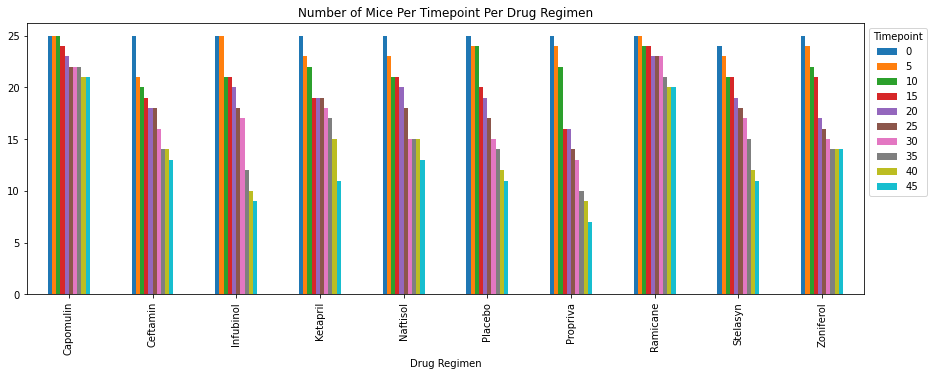

In [10]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.

#Group and count mouse data by drug regimen and then timepoint and select the 'Mouse ID' column
Mouse_Count = clean_mouse.groupby(['Drug Regimen', 'Timepoint']).count()['Mouse ID']

#Create DF and reset index of Mouse_Count
Count_DF = pd.DataFrame(Mouse_Count).reset_index()

#Rearrange Data so that it can be used to create grouped bar graph with pandas
Count_DF_Format = Count_DF.pivot(index = 'Drug Regimen', columns = 'Timepoint', values = 'Mouse ID')

#Specify Column names since we have reset index
Count_DF_Format.columns = ['0', '5', '10', '15', '20', '25', '30', '35', '40', '45']

#Create grouped bar graph with pandas
Count_Pandas_Plot = Count_DF_Format.plot(kind = 'bar', figsize=(15,5),
                                         title = 'Number of Mice Per Timepoint Per Drug Regimen')
#Title and Move Legend
Count_Pandas_Plot = Count_Pandas_Plot.legend(title = 'Timepoint', bbox_to_anchor=(1, 1))

#Display Graph
plt.show()

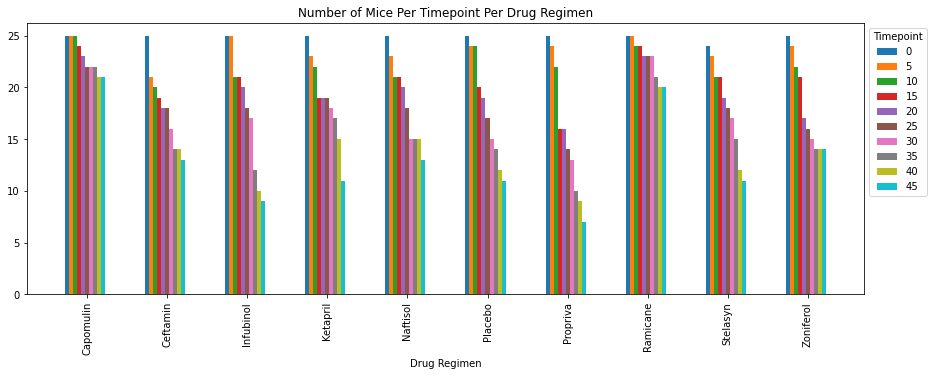

In [11]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course 
# of the study using pyplot.

#Create values for x-axis
pos = np.arange(0,10)

#Create and size plot
Count_PyPlot, ax = plt.subplots(figsize=(15,5))

#Specify width of bars within bar graph
width = 0.05

#Graph data on plot for each timepoint
plt.bar(pos, Count_DF_Format['0'], width)
plt.bar([p + width for p in pos], Count_DF_Format['5'], width)
plt.bar([p + width*2 for p in pos], Count_DF_Format['10'], width)
plt.bar([p + width*3 for p in pos], Count_DF_Format['15'], width)
plt.bar([p + width*4 for p in pos], Count_DF_Format['20'], width)
plt.bar([p + width*5 for p in pos], Count_DF_Format['25'], width)
plt.bar([p + width*6 for p in pos], Count_DF_Format['30'], width)
plt.bar([p + width*7 for p in pos], Count_DF_Format['35'], width)
plt.bar([p + width*8 for p in pos], Count_DF_Format['40'], width)
plt.bar([p + width*9 for p in pos], Count_DF_Format['45'], width)

#Specify location for ticks
ax.set_xticks([p + width*5 for p in pos])

#Label Ticks
ax.set_xticklabels(DR_Sort, rotation=90)

#Label X-Axis
ax.set_xlabel('Drug Regimen')

#Set Title of Chart
ax.set_title('Number of Mice Per Timepoint Per Drug Regimen')

#Create and specify legend location
plt.legend(['0', '5', '10', '15', '20', '25', '30', '35', '40', '45'], title = 'Timepoint', bbox_to_anchor=(1, 1))

#Display Graph
plt.show()

## Pie Plots

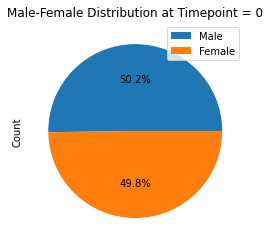

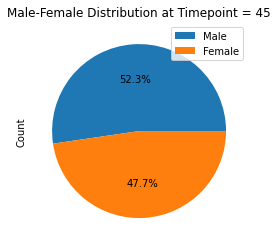

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#Generate Data at Timepoint = 0
Male_i = clean_mouse.loc[(clean_mouse['Sex']=='Male') & (clean_mouse['Timepoint']==0)]
Male_i = Male_i['Mouse ID'].count()

Female_i = clean_mouse.loc[(clean_mouse['Sex']=='Female') & (clean_mouse['Timepoint']==0)]
Female_i = Female_i['Mouse ID'].count()

#Set Labels for Legend
labels = ['Male', 'Female']

#Generate Data at Last Timepoint
Male_f = clean_mouse.loc[(clean_mouse['Sex']=='Male') & (clean_mouse['Timepoint']==45)]
Male_f = Male_f['Mouse ID'].count()

Female_f = clean_mouse.loc[(clean_mouse['Sex']=='Female') & (clean_mouse['Timepoint']==45)]
Female_f = Female_f['Mouse ID'].count()

#Create Data for T=0
Initial_DF = pd.DataFrame({'Count': [Male_i, Female_i]}, index = ['Male', 'Female'] )
plot_i = Initial_DF.plot.pie(y='Count', autopct='%1.1f%%', labels=(' ', ' '), title=('Male-Female Distribution at Timepoint = 0'))
plt.legend(labels,loc=0)

#Create Data for T=45
Initial_DF = pd.DataFrame({'Count': [Male_f, Female_f]}, index = ['Male', 'Female'] )
plot_f = Initial_DF.plot.pie(y='Count', autopct='%1.1f%%', labels=(' ', ' '), title=('Male-Female Distribution at Timepoint = 45'))
plt.legend(labels,loc=0)

#Display Graphs
plt.show()

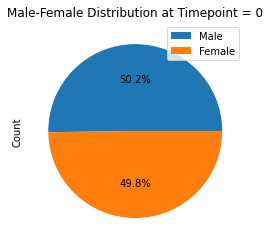

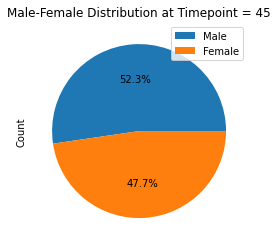

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#Create Pie plot for sex data at timepoint = 0
fig1, ax1 = plt.subplots()
ax1.pie((Male_i, Female_i), autopct='%1.1f%%')
plt.title('Male-Female Distribution at Timepoint = 0')
ax1.set(ylabel='Count')
plt.legend(labels,loc=0)

#Create Pie plot for sex data at timepoint = 45
fig2, ax2 = plt.subplots()
ax2.pie((Male_f, Female_f), autopct='%1.1f%%')
plt.title('Male-Female Distribution at Timepoint = 45')
ax2.set(ylabel='Count')
plt.legend(labels,loc=0)

#Display Graphs
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

#Final Tumor Volumes for Each of the 4 promising treatment regimens
Tumor_V_Capomulin_f = (clean_mouse.loc[(clean_mouse['Drug Regimen']=='Capomulin') & 
                                       (clean_mouse['Timepoint']==45)])['Tumor Volume (mm3)']
Tumor_V_Ceftamin_f = (clean_mouse.loc[(clean_mouse['Drug Regimen']=='Ceftamin') &
                                      (clean_mouse['Timepoint']==45)])['Tumor Volume (mm3)']
Tumor_V_Infubinol_f = (clean_mouse.loc[(clean_mouse['Drug Regimen']=='Infubinol') &
                                       (clean_mouse['Timepoint']==45)])['Tumor Volume (mm3)']
Tumor_V_Ramicane_f = (clean_mouse.loc[(clean_mouse['Drug Regimen']=='Ramicane') &
                                      (clean_mouse['Timepoint']==45)])['Tumor Volume (mm3)']
Cumulative_Tumor_V_f = (clean_mouse.loc[(clean_mouse['Drug Regimen']=='Ramicane') | 
                                        (clean_mouse['Drug Regimen']=='Infubinol') | 
                                        (clean_mouse['Drug Regimen']=='Ceftamin') |
                                        (clean_mouse['Drug Regimen']=='Capomulin') & 
                                        (clean_mouse['Timepoint']==45)])['Tumor Volume (mm3)']

# Capomulin IQR and Outlier Bounds
quartiles_Capomulin = Tumor_V_Capomulin_f.quantile([.25,.75])
lowerq_Capomulin = quartiles_Capomulin[0.25]
upperq_Capomulin = quartiles_Capomulin[0.75]
iqr_Capomulin = upperq_Capomulin-lowerq_Capomulin
lowerb_Capomulin = lowerq_Capomulin - (1.5*iqr_Capomulin)
upperb_Capomulin = upperq_Capomulin + (1.5*iqr_Capomulin)
Capomulin_Outliers = ((Tumor_V_Capomulin_f.loc[(Tumor_V_Capomulin_f <= lowerb_Capomulin) |
                                             (Tumor_V_Capomulin_f >= upperb_Capomulin)]).round(2)).tolist()
                                      


# Ceftamin IQR and Outlier Bounds
quartiles_Ceftamin = Tumor_V_Ceftamin_f.quantile([.25,.75])
lowerq_Ceftamin = (quartiles_Ceftamin[0.25]).round(2)
upperq_Ceftamin = (quartiles_Ceftamin[0.75]).round(2)
iqr_Ceftamin = upperq_Ceftamin-lowerq_Ceftamin
lowerb_Ceftamin = lowerq_Ceftamin - (1.5*iqr_Ceftamin)
upperb_Ceftamin = upperq_Ceftamin + (1.5*iqr_Ceftamin)
Ceftamin_Outliers = ((Tumor_V_Ceftamin_f.loc[(Tumor_V_Ceftamin_f <= lowerb_Ceftamin) |
                                             (Tumor_V_Ceftamin_f >= upperb_Ceftamin)]).round(2)).tolist()

# Infubinol IQR and Outlier Bounds
quartiles_Infubinol = Tumor_V_Infubinol_f.quantile([.25,.75])
lowerq_Infubinol = quartiles_Infubinol[0.25]
upperq_Infubinol = quartiles_Infubinol[0.75]
iqr_Infubinol = upperq_Infubinol-lowerq_Infubinol
lowerb_Infubinol = lowerq_Infubinol - (1.5*iqr_Infubinol)
upperb_Infubinol = upperq_Infubinol + (1.5*iqr_Infubinol)
Infubinol_Outliers = ((Tumor_V_Infubinol_f.loc[(Tumor_V_Infubinol_f <= lowerb_Infubinol) |
                                             (Tumor_V_Infubinol_f >= upperb_Infubinol)]).round(2)).tolist()

# Ramicane IQR and Outlier Bounds
quartiles_Ramicane = Tumor_V_Ramicane_f.quantile([.25,.75])
lowerq_Ramicane = quartiles_Ramicane[0.25]
upperq_Ramicane = quartiles_Ramicane[0.75]
iqr_Ramicane = upperq_Ramicane-lowerq_Ramicane
lowerb_Ramicane = lowerq_Ramicane - (1.5*iqr_Ramicane)
upperb_Ramicane = upperq_Ramicane + (1.5*iqr_Ramicane)
Ramicane_Outliers = ((Tumor_V_Ramicane_f.loc[(Tumor_V_Ramicane_f <= lowerb_Ramicane) |
                                             (Tumor_V_Ramicane_f >= upperb_Ramicane)]).round(2)).tolist()

# Cumulative IQR and Outlier Bounds
quartiles_Cumulative = Cumulative_Tumor_V_f.quantile([.25,.75])
lowerq_Cumulative = quartiles_Cumulative[0.25]
upperq_Cumulative = quartiles_Cumulative[0.75]
iqr_Cumulative = upperq_Cumulative-lowerq_Cumulative
lowerb_Cumulative = lowerq_Cumulative - (1.5*iqr_Cumulative)
upperb_Cumulative = upperq_Cumulative + (1.5*iqr_Cumulative)
Cumulative_Outliers = ((Cumulative_Tumor_V_f.loc[(Cumulative_Tumor_V_f <= lowerb_Cumulative) |
                                             (Cumulative_Tumor_V_f >= upperb_Cumulative)]).round(2)).tolist()

# Print Results
print(f'The lower quartile boundary for Capomulin is {(lowerq_Capomulin).round(2)} and the upper quartile boundary is {(upperq_Capomulin).round(2)}.')
print(f'Any value below {(lowerb_Capomulin).round(2)} or above {(upperb_Capomulin).round(2)} could be considered outliers.')
print(f'The outliers for Capomulin are {Capomulin_Outliers}.')
print('********************************************************************************************')
print(f'The lower quartile boundary for Ceftamin is {lowerq_Ceftamin} and the upper quartile boundary is {upperq_Ceftamin}.')
print(f'Any value below {(lowerb_Ceftamin).round(2)} or above {(upperb_Ceftamin).round(2)} could be considered outliers.')
print(f'The outliers for Ceftamin are {Ceftamin_Outliers}.')
print('*****************************************')
print(f'The lower quartile boundary for Infubinol is {(lowerq_Infubinol).round(2)} and the upper quartile boundary is {(upperq_Infubinol).round(2)}.')
print(f'Any value below {(lowerb_Infubinol).round(2)} or above {(upperb_Infubinol).round(2)} could be considered outliers.')
print(f'The outliers for Infubinol are {Infubinol_Outliers}.')
print('*****************************************')
print(f'The lower quartile boundary for Ramicane is {(lowerq_Ramicane).round(2)} and the upper quartile boundary is {(upperq_Ramicane).round(2)}.')
print(f'Any value below {(lowerb_Ramicane).round(2)} or above {(upperb_Ramicane).round(2)} could be considered outliers.')
print(f'The outliers for Ramicane are {Ramicane_Outliers}.')
print('*****************************************')
print(f'The lower quartile boundary for the Cumulative Response is {(lowerq_Cumulative).round(2)} and the upper quartile boundary is {(upperq_Cumulative).round(2)}.')
print(f'Any value below {(lowerb_Cumulative).round(2)} or above {(upperb_Cumulative).round(2)} could be considered outliers.')
print(f'The outliers for the Cumulative Response are {Cumulative_Outliers}.')

The lower quartile boundary for Capomulin is 32.38 and the upper quartile boundary is 40.16.
Any value below 20.7 or above 51.83 could be considered outliers.
The outliers for Capomulin are [].
********************************************************************************************
The lower quartile boundary for Ceftamin is 61.43 and the upper quartile boundary is 67.53.
Any value below 52.28 or above 76.68 could be considered outliers.
The outliers for Ceftamin are [].
*****************************************
The lower quartile boundary for Infubinol is 62.75 and the upper quartile boundary is 67.69.
Any value below 55.36 or above 75.08 could be considered outliers.
The outliers for Infubinol are [].
*****************************************
The lower quartile boundary for Ramicane is 30.98 and the upper quartile boundary is 38.51.
Any value below 19.69 or above 49.8 could be considered outliers.
The outliers for Ramicane are [].
*****************************************
The low

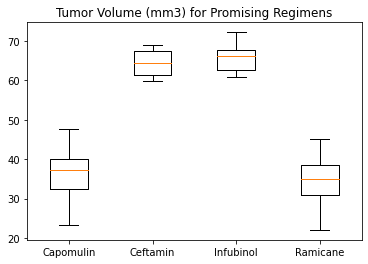

No outliers shown for the following regimens: ['Capomulin', 'Ceftamin', 'Infubinol', 'Ramicane']


In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

#Using data generaged above, group into a list
Data = [Tumor_V_Capomulin_f, Tumor_V_Ceftamin_f, Tumor_V_Infubinol_f, Tumor_V_Ramicane_f]

# Create Plot
fig1, ax = plt.subplots()

#Specify Labels for Box and Whisker Plots
labels = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ramicane']

#Specify Title for Box and Whisker Plot
ax.set_title('Tumor Volume (mm3) for Promising Regimens')

# Create box and Whisker Plots
Boxplot = ax.boxplot(Data, labels=labels)

#Display Box and Whisker Plots
plt.show()

#Display note
print(f'No outliers shown for the following regimens: {labels}')

## Line and Scatter Plots

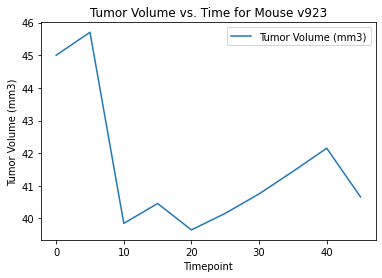

In [17]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

#Create a list of all mice in the Capomulin Trial
Capomulin_Mice = ((clean_mouse.loc[clean_mouse['Drug Regimen']=='Capomulin'])['Mouse ID']).unique()

#Choose a random mouse for the graph creation
mouse = random.choice(Capomulin_Mice)

# Specify data for the random mouse
data = (clean_mouse.loc[clean_mouse['Mouse ID'] == mouse])
x_axis = data['Timepoint']
y_axis = data['Tumor Volume (mm3)']

#Create Line Graph
plt.plot(x_axis, y_axis, label = (f'Tumor Volume (mm3)'))

#Title Line Graph
plt.title(f'Tumor Volume vs. Time for Mouse {mouse}')

#Title Y-Axis
plt.ylabel('Tumor Volume (mm3)')

#Title X-Axis
plt.xlabel('Timepoint')

#Specify Legend Location
plt.legend(loc="best")

# Display Graph
plt.show()

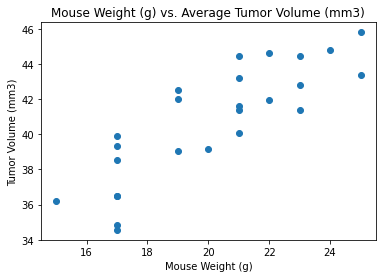

In [18]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

#Select required data
Scatter_Data = clean_mouse.loc[clean_mouse['Drug Regimen'] == 'Capomulin'].groupby(['Mouse ID'])

# Get weight of mice
# Because the weight of the mice is consistant throughout the study, getting the mean is sufficient and 
# gives us the same number of data points
x_axis = Scatter_Data['Weight (g)'].mean()

#Calculate Average Tumor Data
y_axis = Scatter_Data['Tumor Volume (mm3)'].mean()

#Plot Data
plt.scatter(x_axis, y_axis)

#Title Chart
plt.title('Mouse Weight (g) vs. Average Tumor Volume (mm3)')

#Title X-Axis
plt.xlabel('Mouse Weight (g)')

#Title Y-Axis
plt.ylabel('Tumor Volume (mm3)')

#Display Graph
plt.show()

## Correlation and Regression

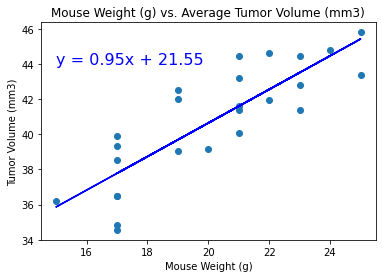

The correlation between mouse weight and average tumor volume is 0.84


In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Calculate the correlation coefficient

correlation = st.pearsonr(x_axis,y_axis)

#Linear Regression Model

#Find Linear Regression Values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)

#Create Equation for the Line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot Same data as above
plt.scatter(x_axis, y_axis)
plt.title('Mouse Weight (g) vs. Average Tumor Volume (mm3)')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Tumor Volume (mm3)')

#Annotate line equation on scatter plit
plt.annotate(line_eq,(15,44),color="blue", fontsize = 16)

#Create and Display linear regression best-fit for data
regress_values = x_axis * slope + intercept
plt.plot(x_axis,regress_values, color='blue')

#Display Graph
plt.show()

#Display Pearson correlation coefficient
print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}")